# Predicting the Cost of Natural Disasters

#### By Mike Stegmuller 

## The main problem I am exploring is how much natural disasters cost. I am trying to predict the cost of the next natural disaster by choosing the best machine learning model. The metrics I am using to make my predictions are type of disaster, number of days a disaster lasts, number of deaths, and inflation rate.

### Importing libraries and data

In [1]:
#conda install pydotplus
#!pip install --upgrade scikit-learn==0.20.3

In [2]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
from sklearn.preprocessing import StandardScaler
import warnings 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model  import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_iris

import graphviz
from graphviz import Digraph

import graphviz as gr

from sklearn import datasets
from sklearn import svm

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float

In [3]:
df = pd.read_csv('Files/df' , index_col=0)
df.head()

,Total CPI-Adjusted Cost (Millions of Dollars)_x,Deaths,number_of_days,Inflation rate value,Drought,Flooding,Freeze,Severe Storm,Tropical Cyclone,Wildfire,Winter Storm
0,2678.6,7,7,82383.333333,0,1,0,0,0,0,0
1,2177.2,13,4,82383.333333,0,0,0,0,1,0,0
2,39579.0,1260,182,82383.333333,1,0,0,0,0,0,0
3,2019.2,0,2,90933.333333,0,0,1,0,0,0,0
4,1372.9,20,5,90933.333333,0,0,0,1,0,0,0


In [4]:
df.shape

(376, 11)

In [5]:
X_train = pd.read_csv('Files/X_train' , index_col=0)
X_train.head()


,Deaths,number_of_days,Inflation rate value,Drought,Flooding,Freeze,Severe Storm,Tropical Cyclone,Wildfire,Winter Storm
278,-0.221801,-0.356201,0.691152,0,0,0,1,0,0,0
60,-0.221801,-0.431887,-1.208622,0,0,0,1,0,0,0
119,7.706977,-0.368815,-0.419720,0,0,0,0,1,0,0
266,-0.221801,-0.419273,0.607408,0,0,0,1,0,0,0
352,-0.079057,-0.419273,1.550068,0,0,0,1,0,0,0


In [6]:
X_test = pd.read_csv('Files/X_test' , index_col=0)
X_test.head()

,Deaths,number_of_days,Inflation rate value,Drought,Flooding,Freeze,Severe Storm,Tropical Cyclone,Wildfire,Winter Storm
290,-0.113661,-0.406659,0.750000,0,0,0,1,0,0,0
357,-0.221801,-0.406659,1.550068,0,0,0,1,0,0,0
261,-0.208824,-0.394044,0.607408,0,0,0,1,0,0,0
157,-0.208824,-0.406659,-0.000105,0,0,0,0,0,0,1
145,0.262664,-0.406659,-0.052019,0,0,0,0,1,0,0


In [7]:
y_train = pd.read_csv('Files/y_train' , index_col=0)
y_train.head()

,Total CPI-Adjusted Cost (Millions of Dollars)_x
278,1816.8
60,1161.5
119,195046.1
266,2712.1
352,5740.4


In [8]:
y_test = pd.read_csv('Files/y_test' , index_col=0)
y_test.head()

,Total CPI-Adjusted Cost (Millions of Dollars)_x
290,2779.9
357,1333.3
261,1621.4
157,1160.2
145,41998.3


# Linear Regression 

In [9]:
rModel = linear_model.LinearRegression()

In [10]:
rModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
y_pred = rModel.predict(X_test)

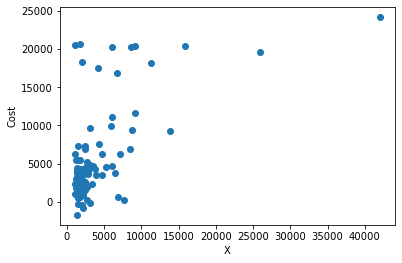

In [12]:
 # Let's plot the predictions against the actual result. Use scatter()
_ = plt.scatter(y_test, y_pred)
_ = plt.xlabel('X')
_ = plt.ylabel('Cost')

In [13]:
#rModel.fit(X_train[['Inflation rate value']], y_train)

In [14]:
#y_pred = rModel.predict(X_test[['Inflation rate value']])

In [15]:
#rModel.fit(X_train[['number_of_days']], y_train)

In [16]:
#y_pred = rModel.predict(X_test[['number_of_days']])

In [17]:
#rModel.fit(X_train[['Deaths']], y_train)

In [18]:
#y_pred = rModel.predict(X_test[['Deaths']])

In [19]:
#  # Let's plot the predictions against the actual result. Use scatter()
# _ = plt.scatter(y_test, y_pred)
# _ = plt.xlabel('X')
# _ = plt.ylabel('Cost')

R squared score

In [20]:
r2_score(y_test, y_pred)

-0.005053879132344008

Mean Absolute Error

In [21]:
mae_rModel = mean_absolute_error(y_test, y_pred)

In [22]:
mae_rModel

3310.8856358511302

In [23]:
#Mean Squared Error

In [24]:
#mse_rModel = MSE(y_test, y_pred)

In [25]:
#mse_rModel

In [26]:
#Root Mean Squared Error

In [27]:
#rmse_rModel = mse_rModel**(1/2)

In [28]:
#rmse_rModel

Linear regression model scoring

In [29]:
rModel_score = rModel.score(X_test, y_test)
rModel_score

-0.005053879132344008

In [30]:
rModel_cross_val_score = (cross_val_score(rModel, X_test, y_test, cv = 20))
rModel_cross_val_score

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

array([ 0.26792068, -2.60296418, -0.08266262, -5.12115601, -1.72961695,
        0.12408641, -3.62652903,  0.61303701,  0.77866743,  0.29976217,
       -0.96858592,  0.70148366,  0.440599  , -2.96977989, -1.36125743,
        0.87131802, -0.53109846, -8.25055969, -1.39151465,  0.77461467])

In [31]:
rModel_cross_val_score_min = (cross_val_score(rModel, X_test, y_test, cv = 20)).min()
rModel_cross_val_score_min

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

-8.250559693474933

In [32]:
rModel_cross_val_score_max = (cross_val_score(rModel, X_test, y_test, cv = 20)).max()
rModel_cross_val_score_max

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

0.8713180160695595

In [33]:
rModel_cross_val_score_mean = (cross_val_score(rModel, X_test, y_test, cv = 20)).mean()
rModel_cross_val_score_mean

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

-1.1882117907981142

The models predictive accuracy is less than 1%, a high chance of a wrong prediction.

The cross validation score, which evaluates and scores on 20 versions of the data. There is one instance where there is 87% accuracy. Better but not good.

Comparing test data to the training data.

In [34]:
rModel_score_train = rModel.score(X_train, y_train)
rModel_score_train

0.459703896647058

In [35]:
rModel_cross_val_score_train = (cross_val_score(rModel, X_train, y_train, cv = 20))
rModel_cross_val_score_train

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask

array([  0.61251563,  -4.76059077,   0.14218092,   0.16600076,
        -0.68140789,  -3.40004635,   0.31358973,   0.27650463,
         0.3069905 ,   0.4963321 ,  -0.61241393,   0.32887738,
        -8.67957383, -25.69140596,  -0.66765158,   0.37166449,
        -0.04068492,  -0.67949414,   0.23818458,   0.49252122])

In [36]:
rModel_cross_val_score_train_min = (cross_val_score(rModel, X_train, y_train, cv = 20)).min()
rModel_cross_val_score_train_min

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

-25.691405960037525

In [37]:
rModel_cross_val_score_train_max = (cross_val_score(rModel, X_train, y_train, cv = 20)).max()
rModel_cross_val_score_train_max

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask

0.6125156318011482

In [38]:
rModel_cross_val_score_train_mean = (cross_val_score(rModel, X_train, y_train, cv = 20)).mean()
rModel_cross_val_score_train_mean

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

-2.073395370679537

The linear regression model train data has a bettor score than the test data, but has less when it comes to the max value.  

### The relatively low scores on the linear regression model indicate that the features do not have enough predictive power to make an accurate prediction.  

# Decision Tree Regressor

In [39]:
dtr = DecisionTreeRegressor(max_depth =4, min_samples_leaf= 0.1, random_state=3)

In [40]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3, splitter='best')

In [41]:
y_predict = dtr.predict(X_test)

Mean Absolute Error

In [42]:
mae_dtr = mean_absolute_error(y_test, y_pred)
mae_dtr

3310.8856358511302

Model Scoring

In [43]:
dtr_score = dtr.score(X_test, y_test)
dtr_score

-1.9959332405320505

In [44]:
dtr_cross_val_score = cross_val_score(dtr, X_test, y_test, cv = 20)
dtr_cross_val_score

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

array([  0.08930465,  -0.47971447,  -0.25178106,  -4.97493679,
         0.91139121,  -0.12402203, -14.79628716,   0.83223892,
        -1.13222844,   0.27693225,   0.67658453,   0.08342149,
        -2.98095165,  -7.05574493,  -1.5257361 ,   0.08563086,
        -0.1051766 ,  -3.45290734,  -4.074046  ,   0.78518683])

In [45]:
dtr_cross_val_score_min = cross_val_score(dtr, X_test, y_test, cv = 20).min()
dtr_cross_val_score_min

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

-14.796287155308438

In [46]:
dtr_cross_val_score_max = cross_val_score(dtr, X_test, y_test, cv = 20).max()
dtr_cross_val_score_max

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

0.911391208302858

In [47]:
dtr_cross_val_score_mean = cross_val_score(dtr, X_test, y_test, cv = 20).mean()
dtr_cross_val_score_mean

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

-1.8606420916095057

The test data does not have an accurate predictive score, however there is an irritation in the cross value score where it performs at 91% accuracy.  

Comparing the training data

In [48]:
dtr_score_train = dtr.score(X_train, y_train)
dtr_score_train

0.32213003694857156

In [49]:
dtr_cross_val_score_train = (cross_val_score(dtr, X_train, y_train, cv = 20))
dtr_cross_val_score_train

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask

array([ 1.85248397e-01, -2.01184282e+01,  6.29998428e-02,  1.67461432e-02,
        2.98972159e-01, -2.87961023e+00,  5.37869930e-01,  8.52648544e-01,
        2.40201225e-01,  2.31928007e-01, -3.26620842e+00,  6.85881230e-01,
       -1.80124983e+01, -2.34534218e+01,  3.69981160e-01,  3.06232044e-01,
       -5.16221745e+00, -5.32009862e-01,  2.92653083e-01,  5.20728085e-01])

In [50]:
dtr_cross_val_score_train_min = (cross_val_score(dtr, X_train, y_train, cv = 20)).min()
dtr_cross_val_score_train_min

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

-23.453421793893078

In [51]:
dtr_cross_val_score_train_max = (cross_val_score(dtr, X_train, y_train, cv = 20)).max()
dtr_cross_val_score_train_max

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

0.8526485442710795

In [52]:
dtr_cross_val_score_train_mean = (cross_val_score(dtr, X_train, y_train, cv = 20)).mean()
dtr_cross_val_score_train_mean

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

-3.441115218851368

### The training data scores are slightly better; however the  train max value is at 85% compared to the test at 91%.  With the minimum values being very far from 0 on both the test and train data, the decision tree model is probably not the best when trying to predict future costs.  

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gr

In [54]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, np.ravel(y_train))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [55]:
y_pred = rfr.predict(X_test)

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Mean Absolute Error

In [56]:
mae_rfr = mean_absolute_error(y_test, y_pred)
mae_rfr

2475.2434739361706

Model Scoring

In [57]:
rfr_score = rfr.score(X_test, y_test)
rfr_score

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.43684145068387825

In [58]:
rfr_cross_val_score = cross_val_score(rfr, X_test, np.ravel(y_test), cv = 20)
rfr_cross_val_score

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: h

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: h

array([ 0.30745904,  0.04948081,  0.2279901 , -1.65065957,  0.39211561,
        0.27246193, -4.02863056, -0.5815824 ,  0.16402386,  0.33411853,
       -0.67561707,  0.51899244, -1.57226875, -0.38950772,  0.42117731,
        0.75834292,  0.06505515, -8.33588903, -2.94576178,  0.77999832])

In [59]:
rfr_cross_val_score_min = cross_val_score(rfr, X_test, np.ravel(y_test), cv = 20).min()
rfr_cross_val_score_min

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: h

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: h

-12.077633982317316

In [60]:
rfr_cross_val_score_max = cross_val_score(rfr, X_test, np.ravel(y_test), cv = 20).max()
rfr_cross_val_score_max

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: h

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: h

0.8452138727203404

In [61]:
rfr_cross_val_score_mean = cross_val_score(rfr, X_test, np.ravel(y_test), cv = 20).mean()
rfr_cross_val_score_mean

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: h

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: h

-0.8737286767999428

Like the decision tree, the test data does not have an accurate predictive score, however there is an irritation in the cross value score where it performs at 76% accuracy.  There are higher cross value scores in the random forest compared to the decision tree. 

Comparing trining data

In [62]:
rfr_score_train = rfr.score(X_train, y_train)
rfr_score_train

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.9258110209392248

In [63]:
rfr_cross_val_score_train = (cross_val_score(rfr, X_train, np.ravel(y_train), cv = 20))
rfr_cross_val_score_train

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: h

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy

array([ 0.49631472, -3.30947662,  0.40941358,  0.37349878,  0.77354194,
       -1.29798129,  0.95330454,  0.60156455, -0.06566167,  0.39706233,
        0.22466316,  0.3511786 , -1.19506452, -8.03290367, -0.32582366,
        0.90457868, -0.07589418,  0.13111914,  0.6845422 , -0.2884931 ])

In [64]:
rfr_cross_val_score_train_min = (cross_val_score(rfr, X_train, np.ravel(y_train), cv = 20)).min()
rfr_cross_val_score_train_min

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: h

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy

-8.655671534999653

In [65]:
rfr_cross_val_score_train_max = (cross_val_score(rfr, X_train, np.ravel(y_train), cv = 20)).max()
rfr_cross_val_score_train_max

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: h

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: h

0.9378978247505891

In [66]:
rfr_cross_val_score_train_mean = (cross_val_score(rfr, X_train, np.ravel(y_train), cv = 20)).mean()
rfr_cross_val_score_train_mean

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: h

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: h

-0.40068087553657195

The training data scored higher on both the score and had multiple instances over 50% accuracy. 

### The Random Forest model has both a good model score and good cross value scores.  Most of the scores are close to 0.

# Comparing the models

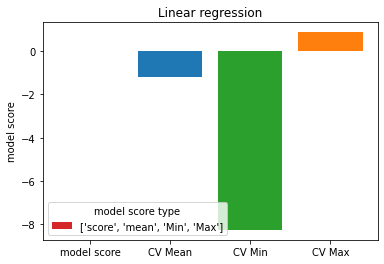

In [67]:
fig, ax = plt.subplots()

model_scores = ['model score', 'CV Mean', 'CV Min', 'CV Max']
counts = [rModel_score, rModel_cross_val_score_mean, rModel_cross_val_score_min, rModel_cross_val_score_max]
bar_labels = ['score', 'mean', 'Min', 'Max']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']


ax.bar(model_scores, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('model score')
ax.set_title('Linear regression')
ax.legend(title='model score type')

plt.show()

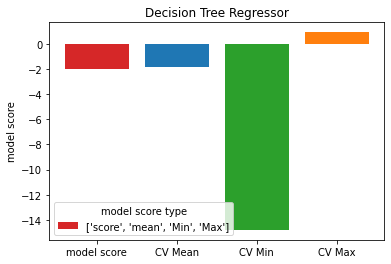

In [68]:
fig, ax = plt.subplots()

model_scores = ['model score', 'CV Mean', 'CV Min', 'CV Max']
counts = [dtr_score, dtr_cross_val_score_mean, dtr_cross_val_score_min, dtr_cross_val_score_max]
bar_labels = ['score', 'mean', 'Min', 'Max']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(model_scores, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('model score')
ax.set_title('Decision Tree Regressor')
ax.legend(title='model score type')

plt.show()

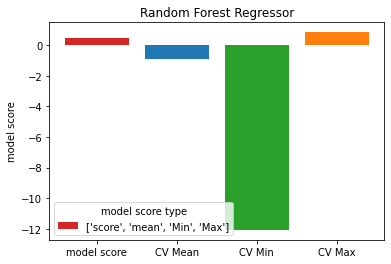

In [69]:
fig, ax = plt.subplots()

model_scores = ['model score', 'CV Mean', 'CV Min', 'CV Max']
counts = [rfr_score, rfr_cross_val_score_mean, rfr_cross_val_score_min, rfr_cross_val_score_max]
bar_labels = ['score', 'mean', 'Min', 'Max']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(model_scores, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('model score')
ax.set_title('Random Forest Regressor')
ax.legend(title='model score type')

plt.show()

In [70]:
myLabels = [ 'Linear Regression','Decision Tree','Random Forest']
model_score= [  rModel_score,dtr_score, rfr_score]
cross_val_score_mean = [ rModel_cross_val_score_mean, dtr_cross_val_score_mean, rfr_cross_val_score_mean]
cross_val_score_min = [ rModel_cross_val_score_min, dtr_cross_val_score_min, rfr_cross_val_score_min]
cross_val_score_max = [ rModel_cross_val_score_max, dtr_cross_val_score_max, rfr_cross_val_score_max]


score_tab_acc = pd.DataFrame(list(zip(myLabels, model_score)), 
               columns =['ML Model Test', 'Model accuracy test score']) 

score_tab = pd.DataFrame(list(zip(myLabels, cross_val_score_mean, cross_val_score_min, cross_val_score_max)), 
               columns =['ML Model', 'Mean', 'Min', 'Max' ]) 
print(score_tab_acc)

score_tab

       ML Model Test  Model accuracy test score
0  Linear Regression                  -0.005054
1      Decision Tree                  -1.995933
2      Random Forest                   0.436841


,ML Model,Mean,Min,Max
0,Linear Regression,-1.188212,-8.250560,0.871318
1,Decision Tree,-1.860642,-14.796287,0.911391
2,Random Forest,-0.873729,-12.077634,0.845214


In [71]:
myLabels = [ 'Linear Regression','Decision Tree','Random Forest']
model_score= [  rModel_score_train,dtr_score_train, rfr_score_train]
cross_val_score_mean = [ rModel_cross_val_score_train_mean, dtr_cross_val_score_train_mean, rfr_cross_val_score_train_mean]
cross_val_score_min = [ rModel_cross_val_score_train_min, dtr_cross_val_score_train_min, rfr_cross_val_score_train_min]
cross_val_score_max = [ rModel_cross_val_score_train_max, dtr_cross_val_score_train_max, rfr_cross_val_score_train_max]


score_tab_acc = pd.DataFrame(list(zip(myLabels, model_score)), 
               columns =['ML Model Train', 'Model accuracy train score']) 

score_tab = pd.DataFrame(list(zip(myLabels, cross_val_score_mean, cross_val_score_min, cross_val_score_max)), 
               columns =['ML Model', 'Mean', 'Min', 'Max' ]) 
print(score_tab_acc)

score_tab

      ML Model Train  Model accuracy train score
0  Linear Regression                    0.459704
1      Decision Tree                    0.322130
2      Random Forest                    0.925811


,ML Model,Mean,Min,Max
0,Linear Regression,-2.073395,-25.691406,0.612516
1,Decision Tree,-3.441115,-23.453422,0.852649
2,Random Forest,-0.400681,-8.655672,0.937898


In [72]:
myLabels = [ 'Linear Regression','Decision Tree','Random Forest']
score_test= [  rModel_score,dtr_score, rfr_score]
score_train=[  rModel_score_train,dtr_score_train, rfr_score_train]
cross_val_score=[ rModel_cross_val_score_max, dtr_cross_val_score_max, rfr_cross_val_score_max]
#cross_val_score2=[ rModel_cross_val_score_min, dtr_cross_val_score_min, rfr_cross_val_score_min]
#cross_val_score3=[ rModel_cross_val_score_mean, dtr_cross_val_score_mean, rfr_cross_val_score_mean]

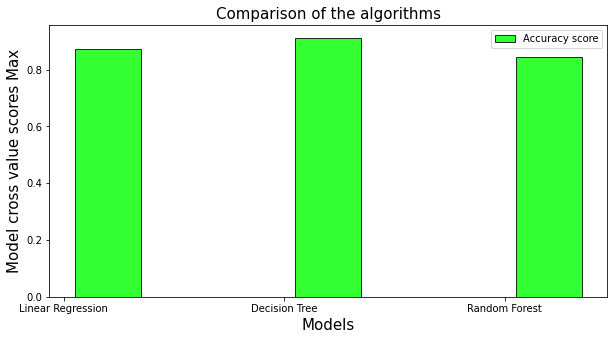

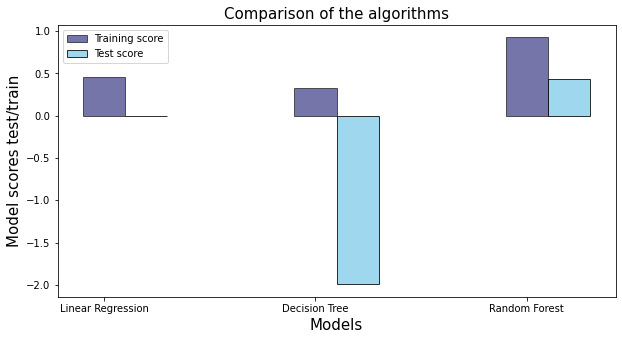

In [73]:
index=[1,2,3]
index_acc=[1.2,2.2,3.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model cross value scores Max',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
#patterns = [ "/"]
_=plt.bar(index_acc,cross_val_score,color='lime',alpha=0.8,label='Accuracy score',edgecolor='k',width=0.3)
#_=plt.bar(index_acc,cross_val_score2,color='g',alpha=0.8,label='Accuracy score',edgecolor='k',width=0.3)
#_=plt.bar(index_acc,cross_val_score3,color='darkgreen',alpha=0.8,label='Accuracy score',edgecolor='k',width=0.3)
plt.xticks([1, 2,3], myLabels)
plt.legend()
#plt.savefig("26.png")
plt.show()

#plotting and comparing ROC-AUC train/test scores:

index=[1,2,3]
index_acc=[1.2,2.2,3.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model scores test/train',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index,score_train,color='midnightblue',alpha=0.6,label='Training score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,score_test,color='skyblue',alpha=0.8,label='Test score',edgecolor='k',width=0.2)
plt.xticks([1, 2,3], myLabels)
plt.legend()
#plt.savefig("27.png")
plt.show()

## In conclusion, I believe the random forest machine learning model is the best for predicting the data. The random forest regressor had positive model scores, in particular, with the training data. It combines multiple decision trees into a single model. It uses 100 decision tree models to make final predictions based on the average of the individual trees. In this model the overall score for the test data is .84 which is great for predictive accuracy. In the cross value score, there were multiple scores over 70%, another good sign. In the bar graph the mean, min and max bars are all very close to 1 and both the test and train data are over 0. The train data also scored very high with a prediction score of .92.

## Testing the prediction

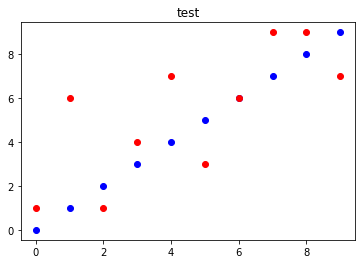

In [74]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return


y_test = range(10)
y_pred = np.random.randint(0, 10, 10)

plotGraph(y_test, y_pred, "test")

In [75]:
_ = sns.regplot(x=y_pred, y=y_test, data= df, line_kws = dict(color = "r"))

AttributeError: 'range' object has no attribute 'shape'

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred, y_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA



In [ ]:
regr = RandomForestRegressor(random_state = 100,bootstrap = True, max_depth=2,max_features=2,min_samples_leaf=3,min_samples_split=5,n_estimators=3)
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reduce_dim', PCA()),
        ('regressor', regr)
        ])
#pipe.fit(X_train,y_train)
#ypipe=pipe.predict(X_test)

pipe.fit(X_train,y_train)
ypipe=pipe.predict([y_pred])

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()
export_graphviz(pipe.named_steps['regressor'].estimators_[0], out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

## The low test scores may indicate low prediction power